In [2]:
import pandas as pd
import openpyxl
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline

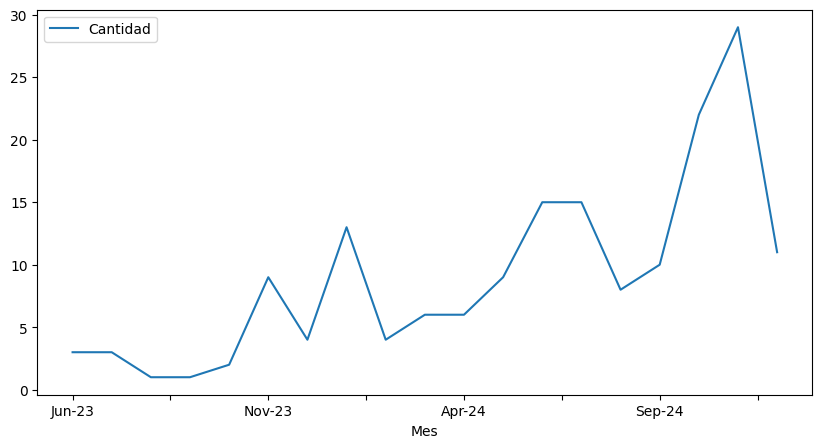

        Cantidad
Mes             
Jun-23         3
Jul-23         3
Aug-23         1
Sep-23         1
Oct-23         2
Nov-23         9
Dec-23         4
Jan-24        13
Feb-24         4
Mar-24         6
Apr-24         6
May-24         9
Jun-24        15
Jul-24        15
Aug-24         8
Sep-24        10
Oct-24        22
Nov-24        29
Dec-24        11


In [16]:
base_ventas = pd.read_excel(r'/home/serway_85/ventasParasoles (2) (2).xlsm',sheet_name='ventas',index_col='Mes')
#base_ventas['Mes']=base_ventas['Mes'].dt.strftime('%b-%y')
base_ventas_pergotek=base_ventas[(base_ventas['Familia']=='PERGOTEK') & (base_ventas['Tipo Factu']== 'PRODUCTO TERMINADO')]
total_nulos=base_ventas_pergotek.isnull().sum()
total_nulos

base_ventas

base_ventas.reset_index(inplace=True)
base_ventas['Mes'] = pd.to_datetime(base_ventas['Mes'], errors='coerce')

base_ventas.reset_index(inplace=True)
#base_ventas['Mes'] = pd.to_datetime(base_ventas['Mes'], errors='coerce')
#base_ventas['Mes'] = base_ventas['Mes'].dt.strftime('%b-%y')
base_ventas.set_index('Mes', inplace=True)
base_analisis=base_ventas[base_ventas['Familia']=='PERGOLITE']

base_analisis=base_analisis.groupby(['Mes'])['Cantidad'].sum().reset_index()
base_analisis = base_analisis.sort_values('Mes')
base_analisis['Mes'] = base_analisis['Mes'].dt.strftime('%b-%y')
base_analisis.set_index('Mes',inplace=True)



ventas=base_analisis['Cantidad']
base_analisis.plot(y='Cantidad',kind='line',figsize=(10,5))
plt.show()
print(base_analisis)



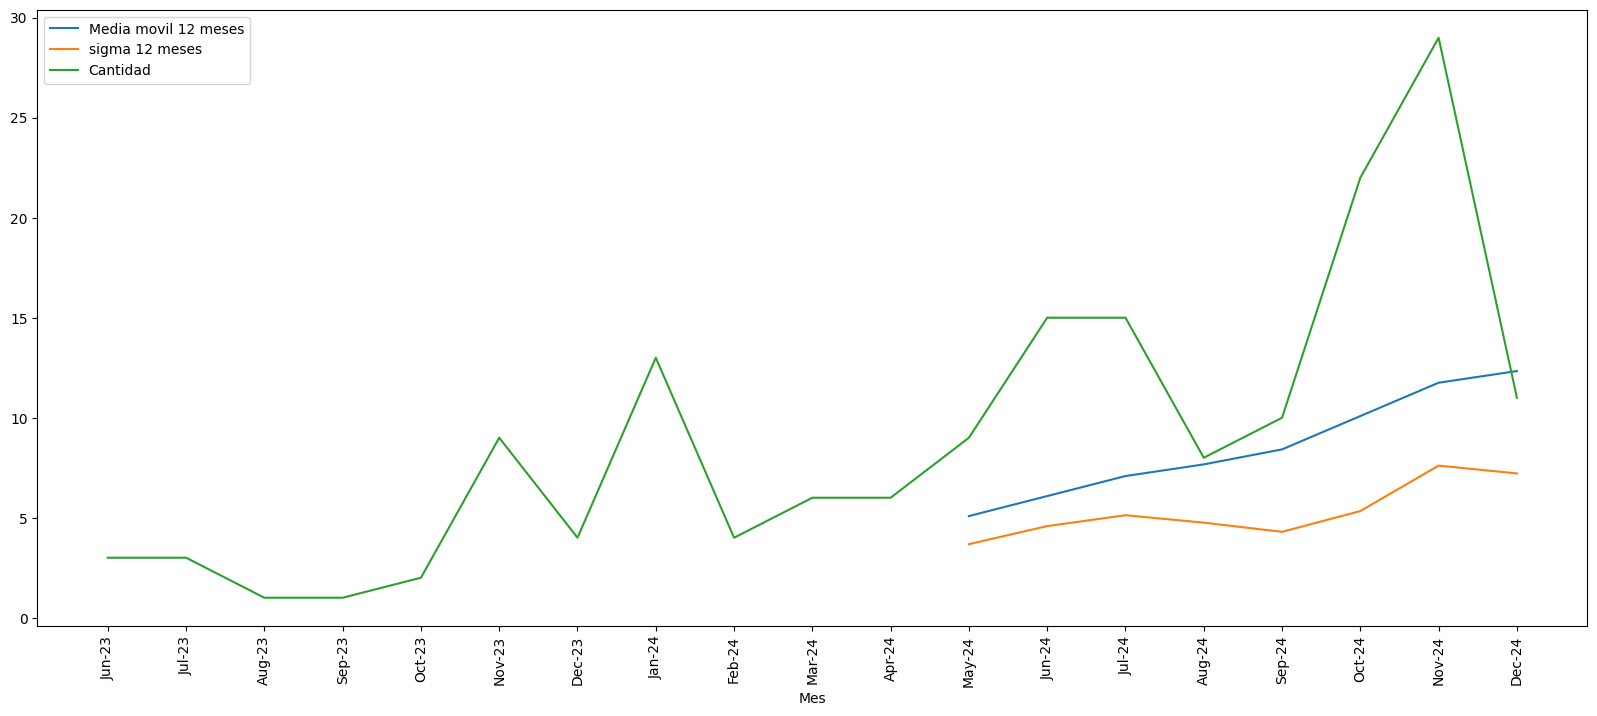

In [29]:
serietiempo = base_analisis['Cantidad']
type(serietiempo)
plt.figure(figsize=(20,8))
serietiempo.rolling(12).mean().plot(label= 'Media movil 12 meses')
serietiempo.rolling(12).std().plot(label= 'sigma 12 meses')
serietiempo.plot()
plt.xticks(rotation=90)  # Rotar los meses para que sean legibles
plt.xticks(ticks=range(len(base_analisis.index)), labels=base_analisis.index) 

plt.legend()


In [ ]:
#prueba de dickey-fuller aumentada

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
resultado = adfuller(base_analisis['Cantidad'])

resultado


(np.float64(1.5864702889809097),
 np.float64(0.9978164124237087),
 7,
 11,
 {'1%': np.float64(-4.223238279489106),
  '5%': np.float64(-3.189368925619835),
  '10%': np.float64(-2.729839421487603)},
 np.float64(63.21686093427043))

In [30]:
#diferenciacion
base_analisis['Primera diferencia'] = base_analisis['Cantidad'] - base_analisis['Cantidad'].shift(1)

<Axes: xlabel='Mes'>

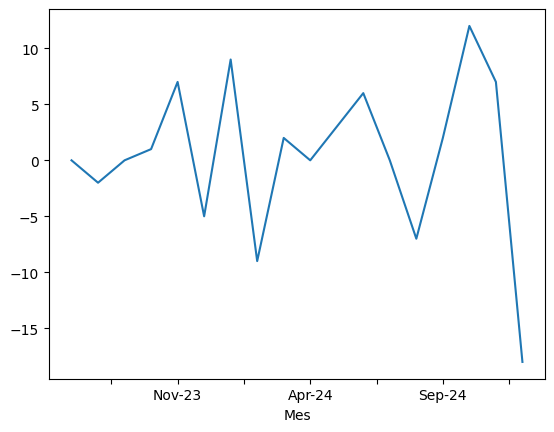

In [31]:
base_analisis['Primera diferencia'].plot()

In [32]:
adfuller(base_analisis['Primera diferencia'].dropna())

(np.float64(-1.983657094433668),
 np.float64(0.2937845451134056),
 7,
 10,
 {'1%': np.float64(-4.331573),
  '5%': np.float64(-3.23295),
  '10%': np.float64(-2.7487)},
 np.float64(51.47721886938674))

In [34]:
base_analisis['Segunda diferencia'] = base_analisis['Primera diferencia'] - base_analisis['Primera diferencia'].shift(1)

<Axes: xlabel='Mes'>

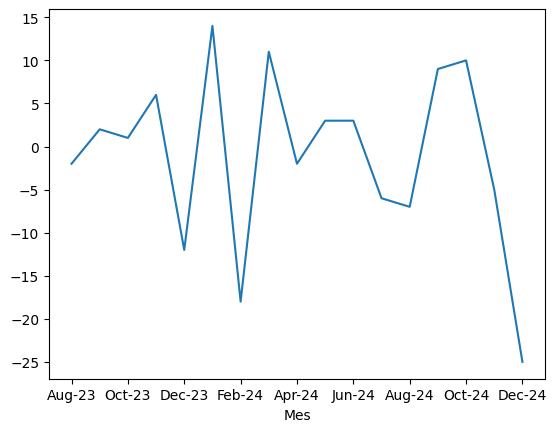

In [35]:
base_analisis['Segunda diferencia'].plot()

In [36]:
adfuller(base_analisis['Segunda diferencia'].dropna())

(np.float64(-1.5120553172747764),
 np.float64(0.5275395402997295),
 6,
 10,
 {'1%': np.float64(-4.331573),
  '5%': np.float64(-3.23295),
  '10%': np.float64(-2.7487)},
 np.float64(65.44053377897073))

In [37]:
#diferencia con estacionalidad
base_analisis['Diferencia Estacionalidad'] = base_analisis['Cantidad'] - base_analisis['Cantidad'].shift(12)

<Axes: xlabel='Mes'>

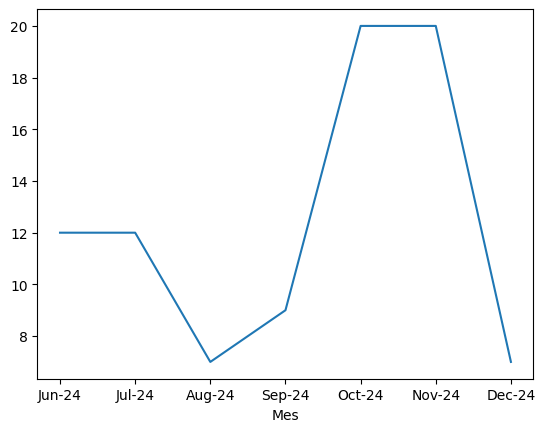

In [38]:
base_analisis['Diferencia Estacionalidad'].plot()

In [39]:
adfuller(base_analisis['Diferencia Estacionalidad'].dropna())

(np.float64(-3.965451795471184),
 np.float64(0.0016026212551856624),
 1,
 5,
 {'1%': np.float64(-6.045114),
  '5%': np.float64(-3.9292800000000003),
  '10%': np.float64(-2.98681)},
 np.float64(29.93342915842488))

In [40]:
base_analisis['Primera Diferencia Estacionalidad'] = base_analisis['Primera diferencia'] - base_analisis['Primera diferencia'].shift(12)

<Axes: xlabel='Mes'>

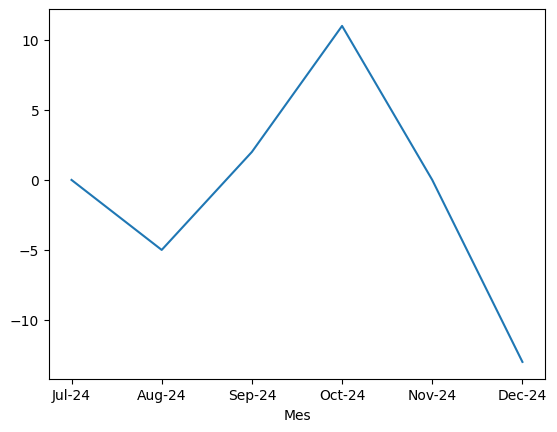

In [41]:
base_analisis['Primera Diferencia Estacionalidad'].plot()

In [42]:
adfuller(base_analisis['Primera Diferencia Estacionalidad'].dropna())

(np.float64(-18.228424588070222),
 np.float64(2.3704951409414057e-30),
 1,
 4,
 {'1%': np.float64(-7.355440625),
  '5%': np.float64(-4.474365000000001),
  '10%': np.float64(-3.1269325)},
 np.float64(12.38568467531467))